# How to generate Temperature / Salinity plots from World Ocean Database profiles

This tutorial shows how to generate TS plots from World Ocean Database CTD casts.  It will show how to compare multiple profiles as well.

This method is an extension of a previous TS diagram method provided by dondiegoibarra [here]( https://oceanpython.org/2013/02/17/t-s-diagram/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from plotting import nice_plots # my module for plot styling, not necessary
import gsw as gsw               # Python seawater package
%matplotlib inline

I have downloaded a number of profiles from the World Ocean Database.  All these profiles were taken near the Antarctic Peninsula.  First I will define the profiles I am interested in comparing.

In [3]:
# Directory of CTD profiles
data_dir   = '/Users/jakelarson/Projects/antarctica_ctd/ocldb1465919697.6573.CTD/'

# List of profiles of interest
profile_arr = [ 'wod_016492402O.nc', 'wod_016492402O.nc','wod_016492401O.nc', 'wod_016492400O.nc', \
               'wod_016492399O.nc', 'wod_016492398O.nc']

## Single profile example
To start, lets just plot the data from the first cast in our list.  We need to load the cast and determine a few parameters for generating isopycnals.   

In [4]:
# Load data from first cast
data = Dataset(data_dir+profile_arr[0])        # Open the .nc file for the cast of interest
temperature = data.variables['Temperature'][:] # Load temperature data
salinity    = data.variables['Salinity'][:]    # Load salinity data
depth       = data.variables['z'][:]           # Load depth information

# Define the min / max values for plotting isopycnals
t_min = temperature.min() - 1
t_max = temperature.max() + 1
s_min = salinity.min() - 1
s_max = salinity.max() + 1

# Calculate how many gridcells we need in the x and y dimensions
xdim = np.ceil(s_max - s_min)/0.1
ydim = np.ceil(t_max-t_min)
dens = np.zeros((int(ydim),int(xdim)))

# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(0,ydim,ydim)+t_min
si = np.linspace(1,xdim,xdim)*0.1+s_min

# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.rho(si[i],ti[j],0)

# Subtract 1000 to convert to sigma-t
dens = dens - 1000

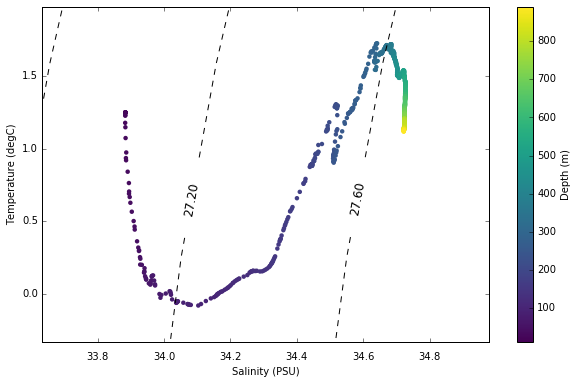

In [5]:
plt.figure(figsize=(10,6))
CS = plt.contour(si,ti,dens, linestyles='dashed', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%.2f') # Label every second level
plt.scatter(salinity,temperature, c=depth, cmap=plt.cm.viridis, lw=0)
plt.xlim([s_min + .75, s_max-0.75]); plt.ylim([t_min + 0.75, t_max - 0.75])
plt.xlabel('Salinity (PSU)'); plt.ylabel('Temperature (degC)')
plt.colorbar(label='Depth (m)')

## Multiple cast TS plots
Here we will do the same as above but add one simple step to plot multiple casts

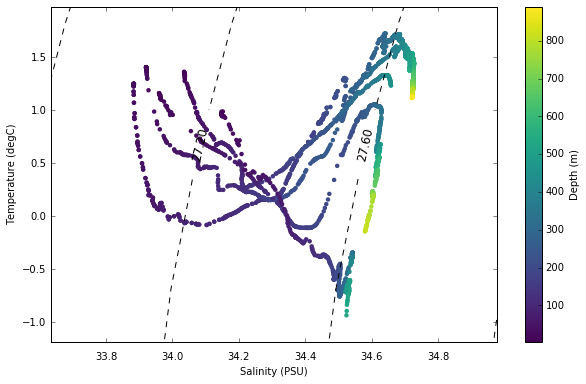

In [6]:
temp_arr  = []
sal_arr   = []
depth_arr = []
for profiles in profile_arr:
    # Load data from first cast
    data = Dataset(data_dir+profiles)        # Open the .nc file for the cast of interest
    temp_arr  = np.append(temp_arr, data.variables['Temperature'][:]) # Load temperature data
    sal_arr   = np.append(sal_arr, data.variables['Salinity'][:])    # Load salinity data
    depth_arr = np.append(depth_arr, data.variables['z'][:])          # Load depth information

# Define the min / max values for plotting isopycnals
t_min = temp_arr.min() - 1
t_max = temp_arr.max() + 1
s_min = sal_arr.min() - 1
s_max = sal_arr.max() + 1

# Calculate how many gridcells we need in the x and y dimensions
xdim = np.ceil(s_max - s_min)/0.1
ydim = np.ceil(t_max-t_min)
dens = np.zeros((int(ydim),int(xdim)))

# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(0,ydim,ydim)+t_min
si = np.linspace(1,xdim,xdim)*0.1+s_min

# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.rho(si[i],ti[j],0)

# Subtract 1000 to convert to sigma-t
dens = dens - 1000

plt.figure(figsize=(10,6))
CS = plt.contour(si,ti,dens, linestyles='dashed', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%.2f') # Label every second level
plt.scatter(sal_arr,temp_arr, c = depth_arr, cmap=plt.cm.viridis, lw=0)
plt.xlim([s_min + .75, s_max-0.75]); plt.ylim([t_min + 0.75, t_max - 0.75])
plt.xlabel('Salinity (PSU)'); plt.ylabel('Temperature (degC)')
plt.colorbar(label='Depth (m)')